In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
data = pd.read_csv('../data/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [52]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [53]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


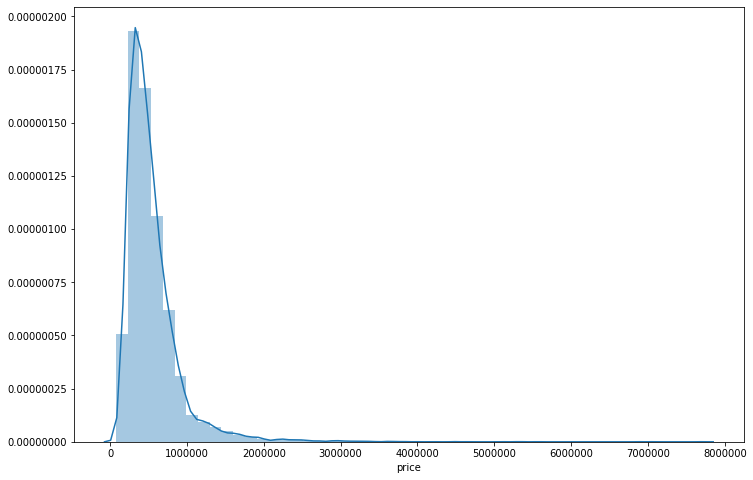

In [54]:
plt.figure(figsize=(12, 8))
sns.distplot(data['price'])
plt.show()

In [55]:
data.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

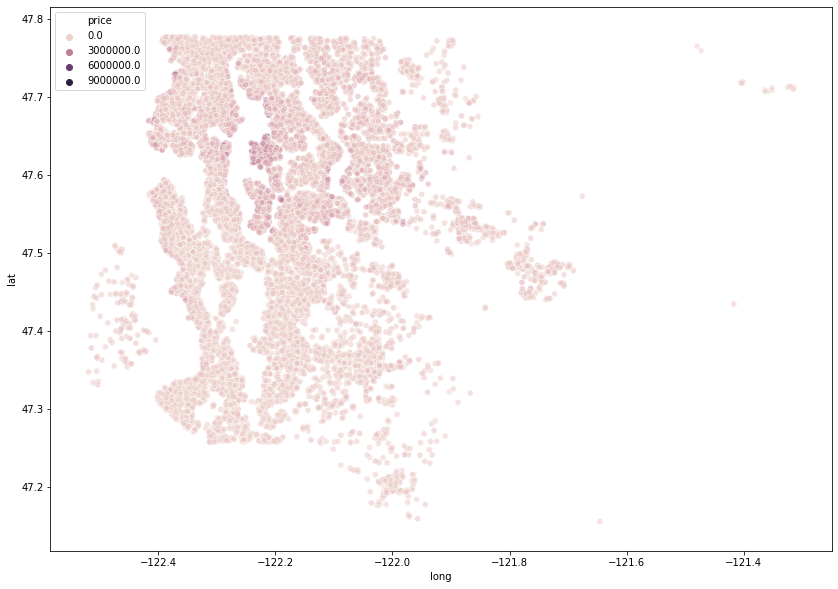

In [56]:
plt.figure(figsize=(14, 10))
sns.scatterplot(x='long', y='lat', alpha=0.5, hue='price', data=data)
plt.show()

In [58]:
X_train.shape

(16197, 20)

## Data preprocessing

In [64]:
data = data.drop('id', axis=1)
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].apply(lambda d: d.year)
data['month'] = data['date'].apply(lambda d: d.month)
data = data.drop('date', axis=1)
data = data.drop('zipcode', axis=1)

In [65]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


In [67]:
from sklearn.model_selection import train_test_split

X = data.drop('price', axis=1).values
y = data['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [72]:
X_train.shape

(16197, 19)

In [68]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [96]:
#X_train = X_train[y_train > 3000000]
#y_train = y_train[y_train > 3000000]

## The model

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [97]:
model = Sequential()

model.add(Input(X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')

In [98]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=1024, epochs=500)

Train on 35 samples, validate on 5400 samples
Epoch 1/500
35/35 [==============================] - 1s 38ms/sample - loss: 14429387227136.0000 - val_loss: 446860383718.9689
Epoch 2/500
35/35 [==============================] - 0s 2ms/sample - loss: 14429387227136.0000 - val_loss: 446860318182.9689
Epoch 3/500
35/35 [==============================] - 0s 2ms/sample - loss: 14429387227136.0000 - val_loss: 446860277502.1037
Epoch 4/500
35/35 [==============================] - 0s 3ms/sample - loss: 14429387227136.0000 - val_loss: 446860213665.1852
Epoch 5/500
35/35 [==============================] - 0s 4ms/sample - loss: 14429387227136.0000 - val_loss: 446860139099.7808
Epoch 6/500
35/35 [==============================] - 0s 3ms/sample - loss: 14429386178560.0000 - val_loss: 446860059437.1318
Epoch 7/500
35/35 [==============================] - 0s 3ms/sample - loss: 14429384081408.0000 - val_loss: 446860014241.5645
Epoch 8/500
35/35 [==============================] - 0s 3ms/sample - loss: 144

Epoch 66/500
35/35 [==============================] - 0s 3ms/sample - loss: 14429316972544.0000 - val_loss: 446849468042.8089
Epoch 67/500
35/35 [==============================] - 0s 2ms/sample - loss: 14429313826816.0000 - val_loss: 446849052787.2948
Epoch 68/500
35/35 [==============================] - 0s 2ms/sample - loss: 14429309632512.0000 - val_loss: 446848587821.5111
Epoch 69/500
35/35 [==============================] - 0s 2ms/sample - loss: 14429306486784.0000 - val_loss: 446848133584.2133
Epoch 70/500
35/35 [==============================] - 0s 2ms/sample - loss: 14429303341056.0000 - val_loss: 446847623422.8622
Epoch 71/500
35/35 [==============================] - 0s 3ms/sample - loss: 14429300195328.0000 - val_loss: 446847108746.8089
Epoch 72/500
35/35 [==============================] - 0s 2ms/sample - loss: 14429297049600.0000 - val_loss: 446846588973.5111
Epoch 73/500
35/35 [==============================] - 0s 2ms/sample - loss: 14429293903872.0000 - val_loss: 4468460291

Epoch 131/500
35/35 [==============================] - 0s 2ms/sample - loss: 14428822044672.0000 - val_loss: 446776313555.6266
Epoch 132/500
35/35 [==============================] - 0s 3ms/sample - loss: 14428808413184.0000 - val_loss: 446774242957.8430
Epoch 133/500
35/35 [==============================] - 0s 2ms/sample - loss: 14428794781696.0000 - val_loss: 446772153718.7081
Epoch 134/500
35/35 [==============================] - 0s 3ms/sample - loss: 14428780101632.0000 - val_loss: 446770068994.2756
Epoch 135/500
35/35 [==============================] - 0s 2ms/sample - loss: 14428765421568.0000 - val_loss: 446767892179.6266
Epoch 136/500
35/35 [==============================] - 0s 2ms/sample - loss: 14428749692928.0000 - val_loss: 446765692208.9244
Epoch 137/500
35/35 [==============================] - 0s 2ms/sample - loss: 14428736061440.0000 - val_loss: 446763463984.9244
Epoch 138/500
35/35 [==============================] - 0s 2ms/sample - loss: 14428720332800.0000 - val_loss: 44

Epoch 196/500
35/35 [==============================] - 0s 2ms/sample - loss: 14427298463744.0000 - val_loss: 446553436590.8385
Epoch 197/500
35/35 [==============================] - 0s 2ms/sample - loss: 14427262812160.0000 - val_loss: 446548394833.5407
Epoch 198/500
35/35 [==============================] - 0s 2ms/sample - loss: 14427227160576.0000 - val_loss: 446543206761.0548
Epoch 199/500
35/35 [==============================] - 0s 3ms/sample - loss: 14427192557568.0000 - val_loss: 446537984221.4874
Epoch 200/500
35/35 [==============================] - 0s 2ms/sample - loss: 14427155857408.0000 - val_loss: 446532705757.8666
Epoch 201/500
35/35 [==============================] - 0s 2ms/sample - loss: 14427119157248.0000 - val_loss: 446527322776.4622
Epoch 202/500
35/35 [==============================] - 0s 2ms/sample - loss: 14427082457088.0000 - val_loss: 446521978776.8415
Epoch 203/500
35/35 [==============================] - 0s 2ms/sample - loss: 14427044708352.0000 - val_loss: 44

Epoch 261/500
35/35 [==============================] - 0s 2ms/sample - loss: 14424078286848.0000 - val_loss: 446086009469.1556
Epoch 262/500
35/35 [==============================] - 0s 2ms/sample - loss: 14424013275136.0000 - val_loss: 446076401114.8326
Epoch 263/500
35/35 [==============================] - 0s 2ms/sample - loss: 14423947214848.0000 - val_loss: 446066750380.5630
Epoch 264/500
35/35 [==============================] - 0s 2ms/sample - loss: 14423879057408.0000 - val_loss: 446057034110.2933
Epoch 265/500
35/35 [==============================] - 0s 3ms/sample - loss: 14423811948544.0000 - val_loss: 446047235361.7541
Epoch 266/500
35/35 [==============================] - 0s 2ms/sample - loss: 14423742742528.0000 - val_loss: 446037330396.3496
Epoch 267/500
35/35 [==============================] - 0s 3ms/sample - loss: 14423674585088.0000 - val_loss: 446027355380.2430
Epoch 268/500
35/35 [==============================] - 0s 2ms/sample - loss: 14423605379072.0000 - val_loss: 44

Epoch 326/500
35/35 [==============================] - 0s 2ms/sample - loss: 14418549145600.0000 - val_loss: 445286390897.7778
Epoch 327/500
35/35 [==============================] - 0s 2ms/sample - loss: 14418443239424.0000 - val_loss: 445271074697.6711
Epoch 328/500
35/35 [==============================] - 0s 3ms/sample - loss: 14418335236096.0000 - val_loss: 445255627425.5645
Epoch 329/500
35/35 [==============================] - 0s 3ms/sample - loss: 14418229329920.0000 - val_loss: 445240108403.6741
Epoch 330/500
35/35 [==============================] - 0s 3ms/sample - loss: 14418120278016.0000 - val_loss: 445224522146.7022
Epoch 331/500
35/35 [==============================] - 0s 4ms/sample - loss: 14418012274688.0000 - val_loss: 445208756806.5422
Epoch 332/500
35/35 [==============================] - 0s 3ms/sample - loss: 14417903222784.0000 - val_loss: 445192961514.0030
Epoch 333/500
35/35 [==============================] - 0s 3ms/sample - loss: 14417792073728.0000 - val_loss: 44

Epoch 391/500
35/35 [==============================] - 0s 4ms/sample - loss: 14410136420352.0000 - val_loss: 444074166020.1719
Epoch 392/500
35/35 [==============================] - 0s 4ms/sample - loss: 14409983328256.0000 - val_loss: 444051875333.3096
Epoch 393/500
35/35 [==============================] - 0s 4ms/sample - loss: 14409827090432.0000 - val_loss: 444029526440.7704
Epoch 394/500
35/35 [==============================] - 0s 4ms/sample - loss: 14409671901184.0000 - val_loss: 444007045359.6918
Epoch 395/500
35/35 [==============================] - 0s 4ms/sample - loss: 14409513566208.0000 - val_loss: 443984423594.6667
Epoch 396/500
35/35 [==============================] - 0s 5ms/sample - loss: 14409356279808.0000 - val_loss: 443961682068.6696
Epoch 397/500
35/35 [==============================] - 0s 4ms/sample - loss: 14409196896256.0000 - val_loss: 443938829811.1052
Epoch 398/500
35/35 [==============================] - 0s 3ms/sample - loss: 14409037512704.0000 - val_loss: 44

Epoch 456/500
35/35 [==============================] - 0s 3ms/sample - loss: 14398317920256.0000 - val_loss: 442376212000.6163
Epoch 457/500
35/35 [==============================] - 0s 5ms/sample - loss: 14398107156480.0000 - val_loss: 442345954175.0519
Epoch 458/500
35/35 [==============================] - 0s 4ms/sample - loss: 14397895344128.0000 - val_loss: 442315568093.1082
Epoch 459/500
35/35 [==============================] - 0s 2ms/sample - loss: 14397681434624.0000 - val_loss: 442284992199.4904
Epoch 460/500
35/35 [==============================] - 0s 3ms/sample - loss: 14397468573696.0000 - val_loss: 442254359799.2770
Epoch 461/500
35/35 [==============================] - 0s 3ms/sample - loss: 14397253615616.0000 - val_loss: 442223565258.1452
Epoch 462/500
35/35 [==============================] - 0s 4ms/sample - loss: 14397038657536.0000 - val_loss: 442192617605.4993
Epoch 463/500
35/35 [==============================] - 0s 3ms/sample - loss: 14396820553728.0000 - val_loss: 44

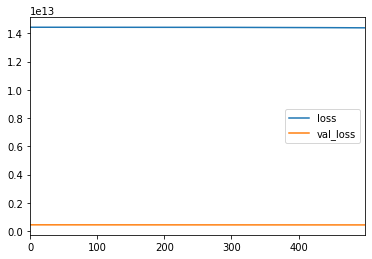

In [99]:
pd.DataFrame(model.history.history).plot()
plt.show()

In [100]:
P = model.predict(X_test)

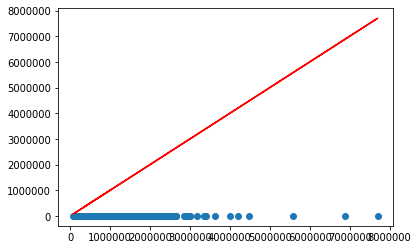

In [101]:
plt.scatter(y_test, P)
plt.plot(y_test, y_test, c='red')
plt.show()